In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [50]:
dataset=pd.read_csv('Connect_Mobile__Attrition_Data_file.csv')

print(dataset.shape)

(100000, 10)


## Handling High Cardinality Variables 

In [51]:
num_complaints_6 = dataset.loc[dataset['Num_complaints']==6]

In [52]:
len(num_complaints_6['active_cust'].unique())

2

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_cust', ylabel='count'>

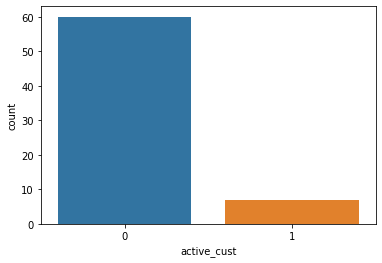

In [53]:
sns.countplot(num_complaints_6['active_cust'],data=dataset)

In [54]:
dataset.loc[(dataset.Num_complaints == 6),'Num_complaints'] = 5 

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_complaints', ylabel='count'>

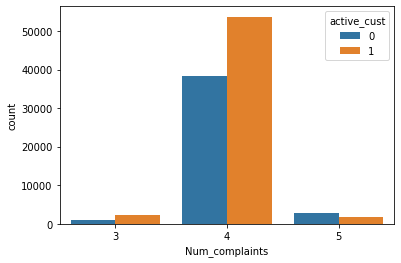

In [55]:
sns.countplot(dataset['Num_complaints'],data=dataset,hue='active_cust')

In [56]:
number_plan_changes = dataset.loc[dataset['number_plan_changes']>=4]

In [57]:
len(number_plan_changes['active_cust'].unique())

2

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_cust', ylabel='count'>

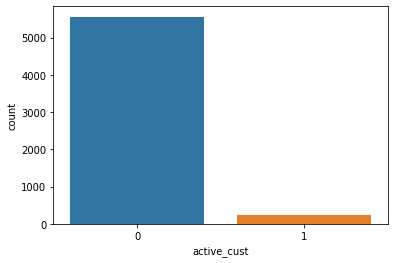

In [58]:
sns.countplot(number_plan_changes['active_cust'],data=dataset)

In [59]:
dataset.loc[(dataset.number_plan_changes >= 4),'number_plan_changes'] = 4 

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_plan_changes', ylabel='count'>

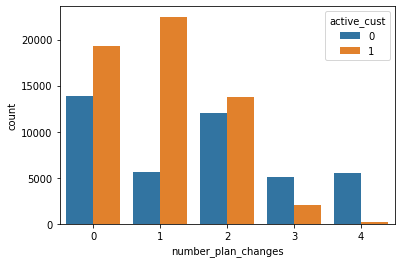

In [60]:
sns.countplot(dataset['number_plan_changes'],data=dataset,hue='active_cust')

In [61]:
dataset.shape

(100000, 10)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_cust', ylabel='count'>

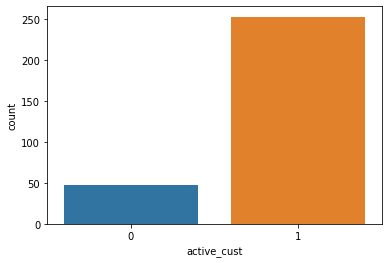

In [62]:
technical_issues_per_month_7 = dataset.loc[dataset['technical_issues_per_month']==7]
sns.countplot(technical_issues_per_month_7['active_cust'],data=dataset)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_cust', ylabel='count'>

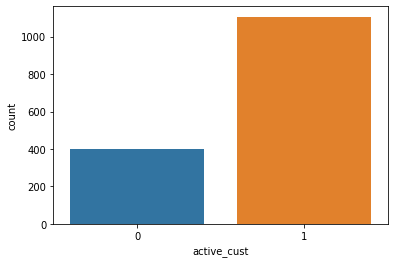

In [63]:
technical_issues_per_month_2 = dataset.loc[dataset['technical_issues_per_month']==2]
sns.countplot(technical_issues_per_month_2['active_cust'],data=dataset)

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_cust', ylabel='count'>

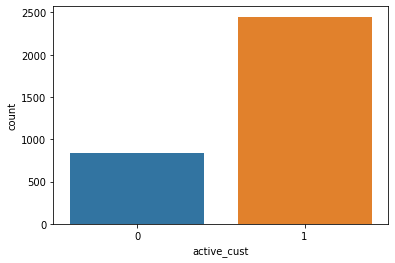

In [64]:
technical_issues_per_month_3 = dataset.loc[dataset['technical_issues_per_month']==3]
sns.countplot(technical_issues_per_month_3['active_cust'],data=dataset)

In [65]:
dataset.loc[(dataset.technical_issues_per_month == 7),'technical_issues_per_month'] = 2 

In [66]:
dataset.loc[(dataset.technical_issues_per_month == 3),'technical_issues_per_month'] = 2 

c:\users\samrat\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='technical_issues_per_month', ylabel='count'>

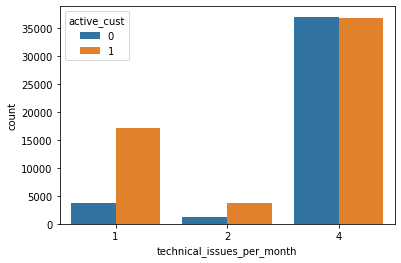

In [67]:
sns.countplot(dataset['technical_issues_per_month'],data=dataset,hue='active_cust')

## Handling Numerical Variables (Outliers)

Income, expenditure and speed test result is having some outliers 

### Using Z Score

In [68]:
def detect_outliers(data):
    outliers=[]
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [69]:
continuous_feature = ['income',
 'expenditure',
 'months_on_network',
 'Speed_test_result']

In [70]:
fea_outliers = []
for feature in continuous_feature:
    outs =detect_outliers(dataset[feature])
    fea_outliers.append(outs)
    print("Number of outliers in {} is {}".format(feature,len(outs)))

Number of outliers in income is 18
Number of outliers in expenditure is 18
Number of outliers in months_on_network is 1315
Number of outliers in Speed_test_result is 145


In [71]:
total_outliers = 0
for outliers_list in fea_outliers:
    outliers_list.sort()
    total_outliers += len(outliers_list)
    print(min(outliers_list))
    print(max(outliers_list))
    print()

21105
229821

16884.0
183856.8

-20
449

112
332



In [72]:
data = dataset.copy()

In [73]:
df_filt = data[~data.income.isin(fea_outliers[0])]

In [74]:
df_filt = df_filt[~df_filt.expenditure.isin(fea_outliers[1])]

In [75]:
df_filt = df_filt[~df_filt.months_on_network.isin(fea_outliers[2])]

In [76]:
df_filt = df_filt[~df_filt.Speed_test_result.isin(fea_outliers[3])]

In [77]:
df_filt.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


In [78]:
df_filt.shape

(98666, 10)

In [79]:
data.shape[0]-total_outliers

98504

In [80]:
df_active=df_filt.loc[dataset['active_cust']==0]
df_left=df_filt.loc[dataset['active_cust']==1]

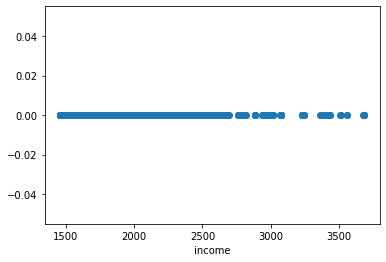

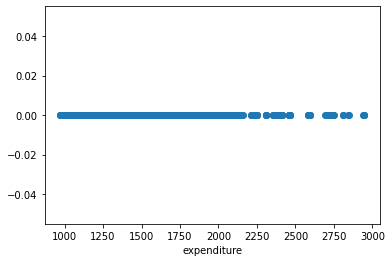

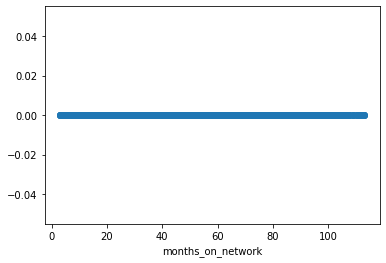

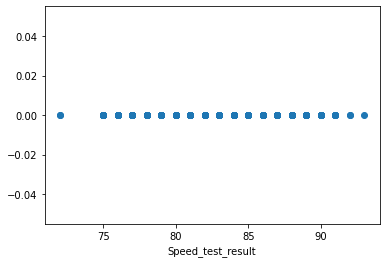

In [81]:
for feature in continuous_feature:
    plt.plot(df_left[feature],np.zeros_like(df_left[feature]),'o')
    plt.xlabel(feature)
    plt.show()

<AxesSubplot:xlabel='active_cust', ylabel='count'>

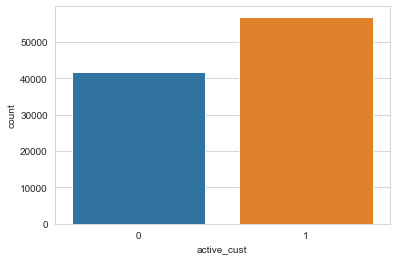

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='active_cust',data=df_filt)

In [83]:
df_filt.to_csv('feature_enginnering_data.csv',index=False)